**1. Import Necessary Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

**2. To read the data into Python.**

In [6]:
df = pd.read_csv('ds/cleaned_nifty50.csv')
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Cr Rs)
0,2024-08-12,24320.05,24472.80,24212.10,24347.00,279925100,30311.85
1,2024-08-13,24342.35,24359.95,24116.50,24139.00,239727640,25459.58
2,2024-08-14,24184.40,24196.50,24099.70,24143.75,303254705,27834.61
3,2024-08-16,24334.85,24563.90,24204.50,24541.15,271611087,28521.90
4,2024-08-19,24636.35,24638.80,24522.95,24572.65,243645503,22124.41


**3. Feature Engineering**

In [7]:
df['Daily_Range'] = df['High'] - df['Low']

**4. Drop Columns**

In [8]:
df = df.drop(columns=['High', 'Low', 'Shares Traded'], axis=1)

print(df.columns)

Index(['Date', 'Open', 'Close', 'Turnover (Cr Rs)', 'Daily_Range'], dtype='object')


**5. Detect Outliers in Engineered Features**

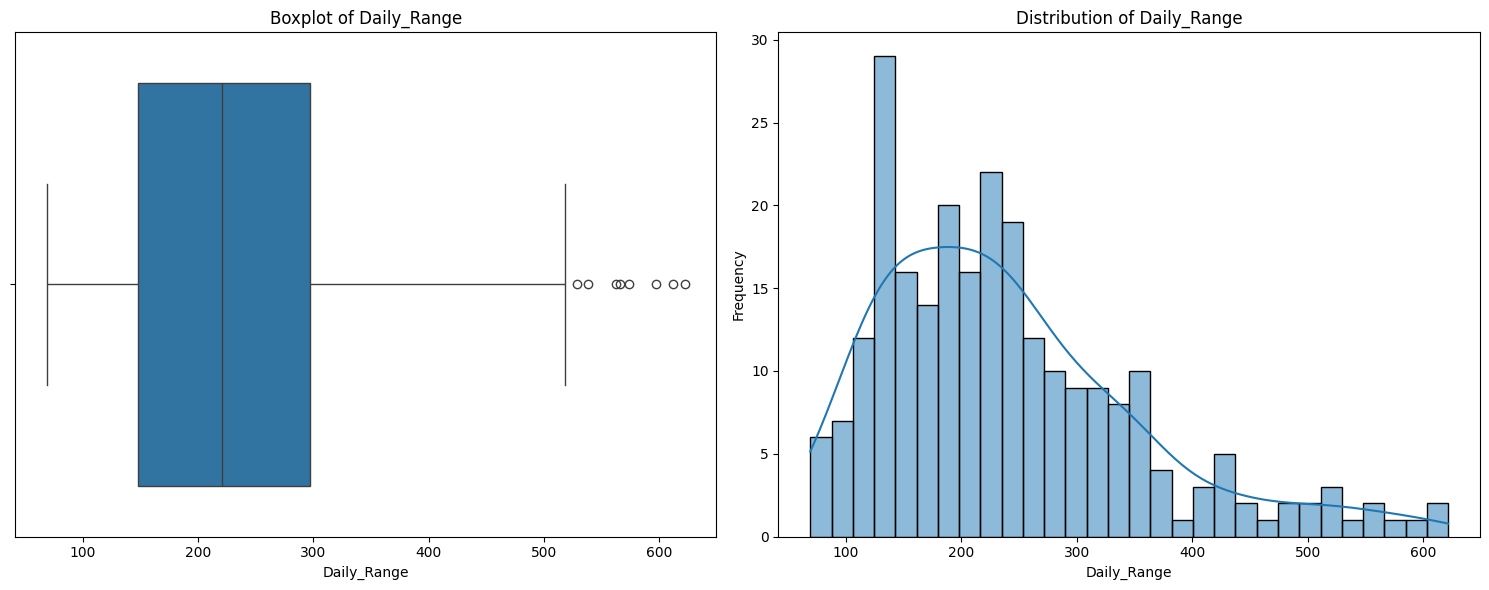

In [9]:
new_features = ['Daily_Range']

for i, col in enumerate(new_features):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.boxplot(x=df[col], ax=axes[0])
    axes[0].set_title(f'Boxplot of {col}')

    sns.histplot(df[col], kde=True, bins=30, ax=axes[1])
    axes[1].set_title(f'Distribution of {col}')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

**6. Handling Outliers of Positively Skewed Attributes**

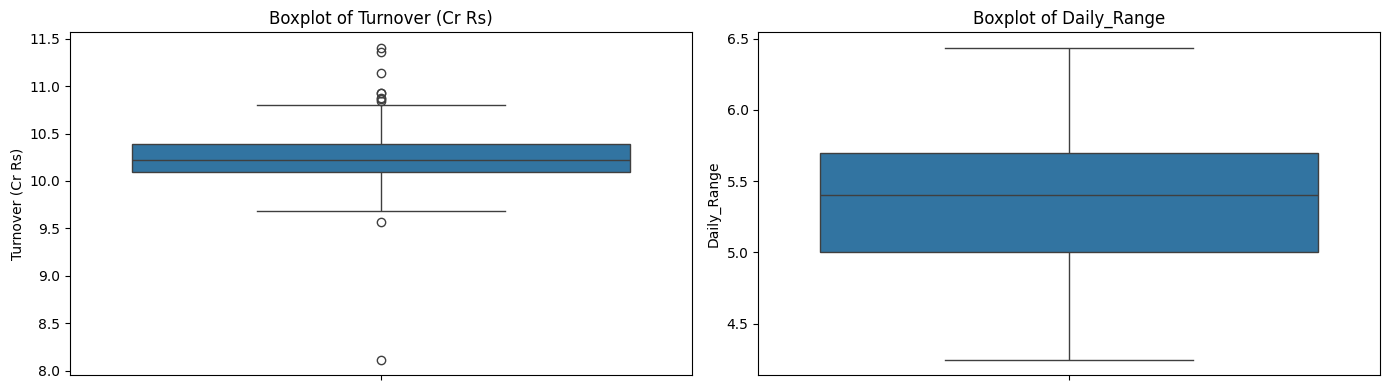

In [10]:
positively_skewed_outlier_columns = ['Turnover (Cr Rs)', 'Daily_Range']

nrows = math.ceil(len(positively_skewed_outlier_columns) / 2)
plt.figure(figsize=(14, nrows * 4))

for i, col in enumerate(positively_skewed_outlier_columns):
    df[col] = np.log1p(df[col])

    plt.subplot(nrows, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**7. Handling Outliers that aren't resolved using Capping**

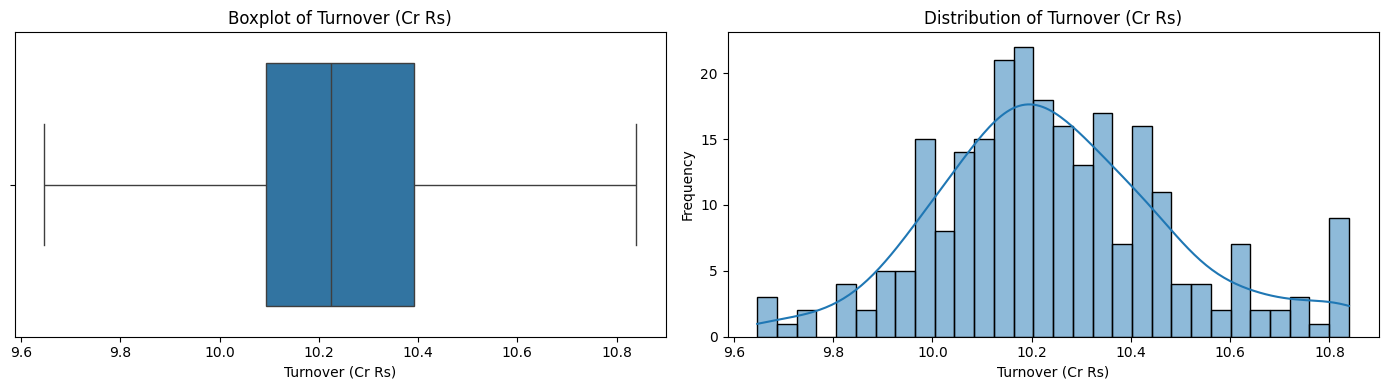

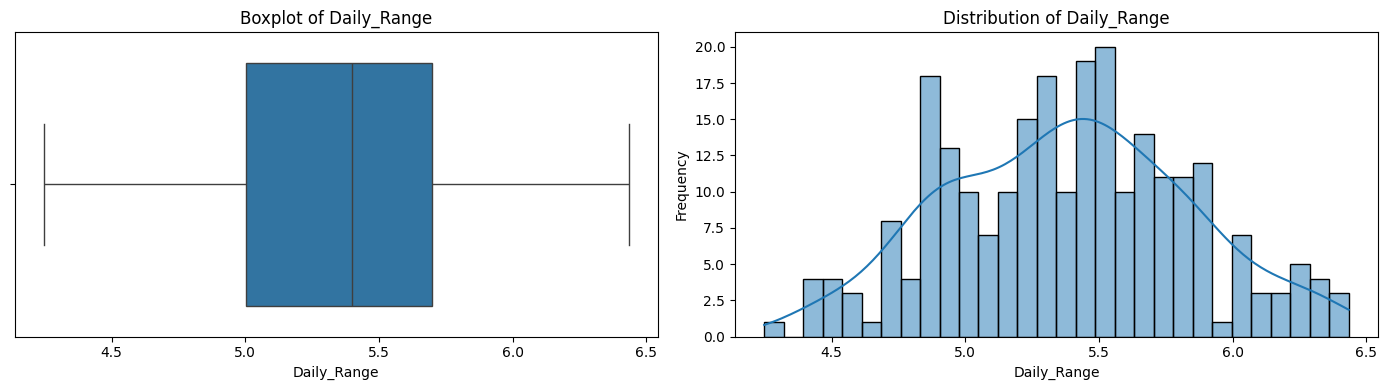

In [11]:
outlier_columns = ['Turnover (Cr Rs)', 'Daily_Range']

for col in outlier_columns:
    Q1= df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    IQR=Q3-Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    median_value = df[col].median()

    df[col] = df[col].astype('float64').copy()

    df.loc[df[col] > upper_bound, col] = upper_bound
    df.loc[df[col] < lower_bound, col] = lower_bound

    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    sns.boxplot(x=df[col], ax=axes[0])
    axes[0].set_title(f'Boxplot of {col}')

    sns.histplot(df[col], kde=True, bins=30, ax=axes[1])
    axes[1].set_title(f'Distribution of {col}')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

**8. Bivariate Analysis Against Target Variable**


--- Bivariate Analysis: Numerical vs. Target Variable ---


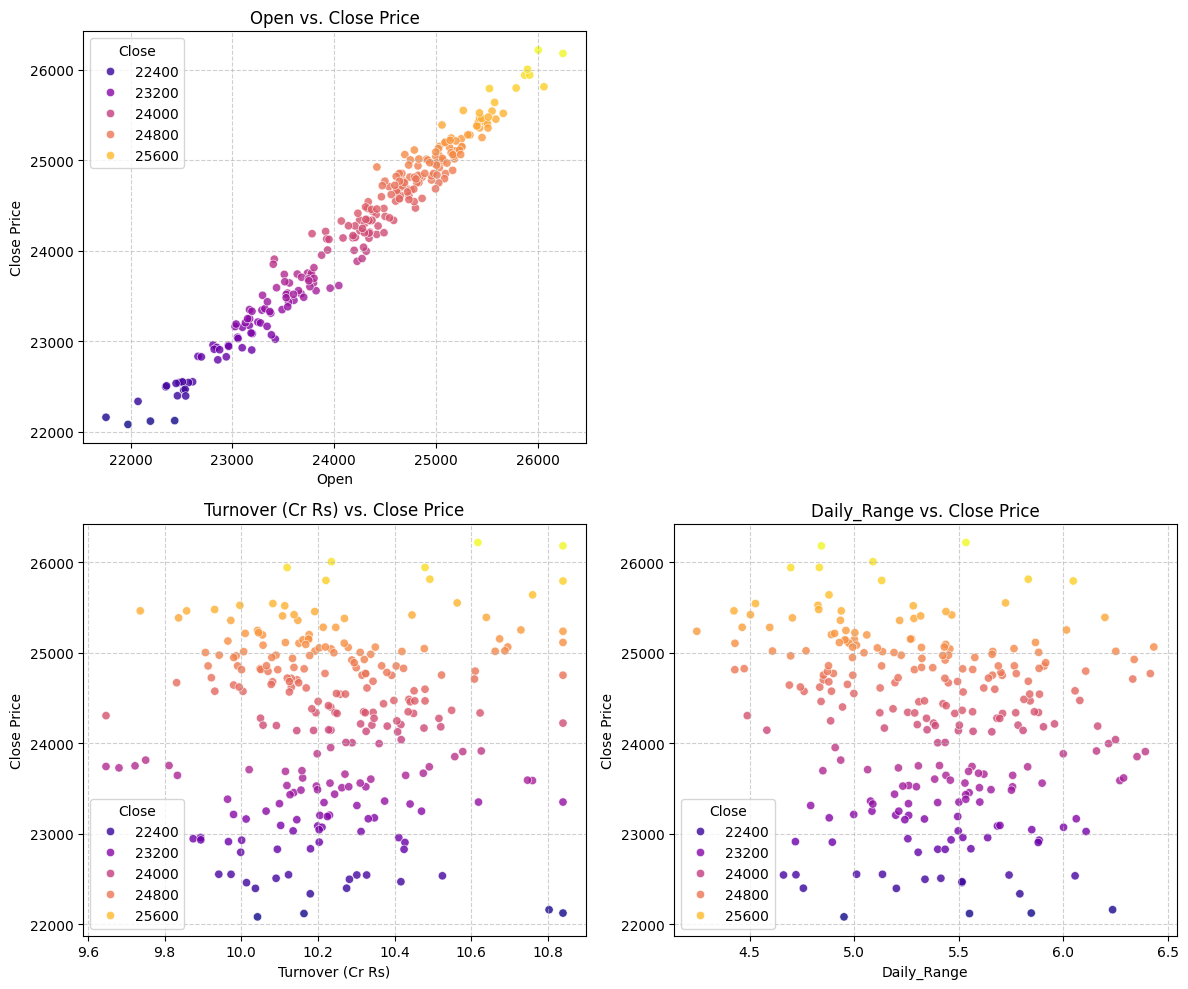

In [14]:
print("\n--- Bivariate Analysis: Numerical vs. Target Variable ---")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

nrows = math.ceil(len(numerical_cols) / 2)
plt.figure(figsize=(12, nrows * 5))

for i, x_col in enumerate(numerical_cols):
    if x_col == 'Close':
        continue
    plt.subplot(nrows, 2, i + 1)
    sns.scatterplot(x=x_col, y='Close', data=df, hue='Close', palette='plasma', alpha=0.8)
    plt.title(x_col + " vs. Close Price")
    plt.xlabel(x_col)
    plt.ylabel('Close Price')
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


**9. Save Dataset**

In [ ]:
df.to_csv('ds/preprocessed_engineered_data.csv', index=False)